In [2]:
import tensorflow as tf import os import pandas as pd import numpy as np from sklearn.preprocessing import MinMaxScaler from keras.models import Sequential from keras.layers import LSTM, Dense import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Datasets/1/dataset_cleaned.csv')

/var/folders/0l/1861hqjd5t17h2zs9trzfyhh0000gn/T/ipykernel_80893/3149955074.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.   df = pd.read_csv('../Datasets/1/dataset_cleaned.csv') 

In [5]:
df.head()

,Grid_ID,Datetime,C1,C2,C3,C4,D1,Year,Month,Day,Time,Tourist_Local,Holiday,Day Moment,Hour,Weekday,Parish,City Zone
0,3000,2022-08-01 21:30:00,49.439999,1.92,34.939999,1.92,Switzerland,2022,8,1,21:30:00,1,No Holiday,Dinner Time,21,0,Olivais,Zona Oriental
1,3000,2022-08-01 17:30:00,66.739998,9.04,48.900002,5.43,Austria;France;Ukraine;Spain;Brazil,2022,8,1,17:30:00,1,No Holiday,Late Afternoon,17,0,Olivais,Zona Oriental
2,3000,2022-08-01 12:00:00,43.869999,4.88,42.740002,4.88,Belgium;Spain,2022,8,1,12:00:00,1,No Holiday,Lunch Time,12,0,Olivais,Zona Oriental
3,3000,2022-08-01 15:45:00,24.860001,7.27,16.410000,5.45,Italy;Brazil,2022,8,1,15:45:00,1,No Holiday,Afternoon,15,0,Olivais,Zona Oriental
4,3000,2022-08-01 19:15:00,48.049999,9.08,37.630001,7.26,Italy;Spain;Ireland;Ukraine,2022,8,1,19:15:00,1,No Holiday,Dinner Time,19,0,Olivais,Zona Oriental


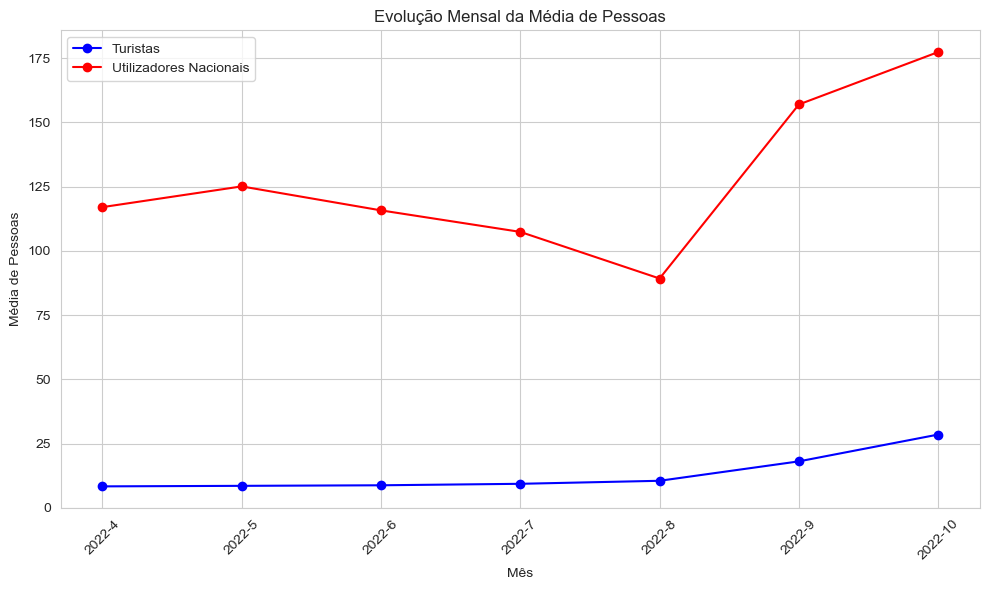

In [5]:
monthly_avg_users_C2 = df.groupby(['Year', 'Month'])['C2'].mean().reset_index() plt.figure(figsize=(10, 6)) plt.plot(monthly_avg_users_C2['Year'].astype(str) + '-' + monthly_avg_users_C2['Month'].astype(str), monthly_avg_users_C2['C2'], marker='o', color='blue', label='Turistas')  monthly_avg_users_C1 = df.groupby(['Year', 'Month'])['C1'].mean().reset_index() plt.plot(monthly_avg_users_C1['Year'].astype(str) + '-' + monthly_avg_users_C1['Month'].astype(str), monthly_avg_users_C1['C1'], marker='o', color='red', label='Utilizadores Nacionais')  plt.title('Evolução Mensal da Média de Pessoas') plt.xlabel('Mês') plt.ylabel('Média de Pessoas') plt.xticks(rotation=45) plt.legend() plt.tight_layout() plt.show()  

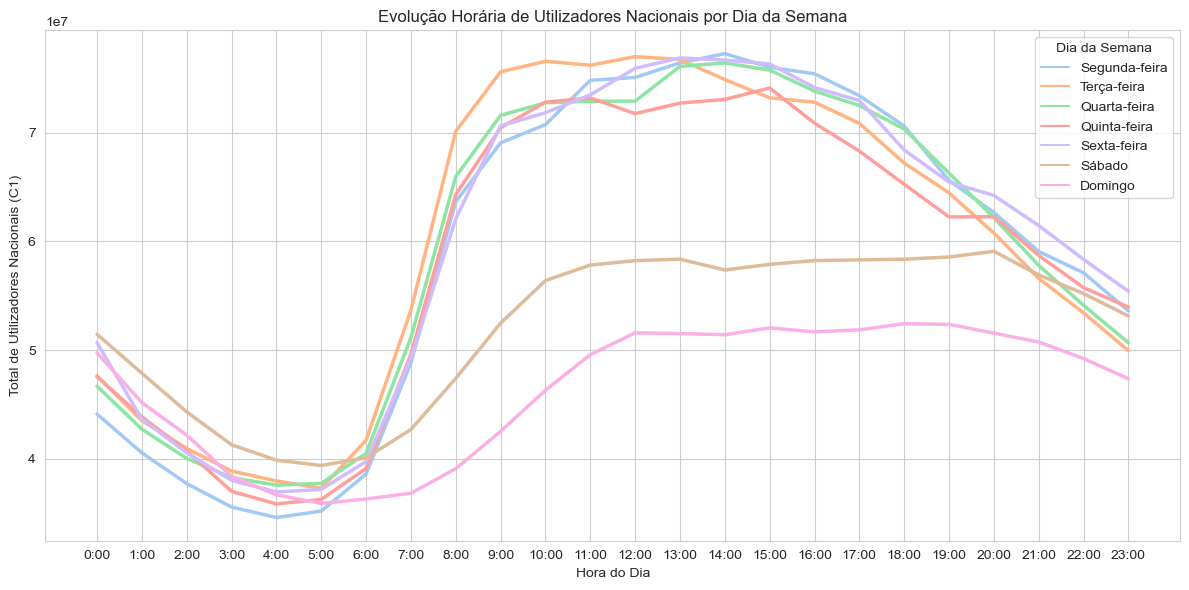

In [14]:
import matplotlib.pyplot as plt import seaborn as sns  weekday_names = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}   hourly_avg_users = df.groupby(['Weekday', 'Hour'])['C1'].sum().reset_index()  hourly_avg_users['Weekday'] = hourly_avg_users['Weekday'].map(weekday_names)  plt.figure(figsize=(12, 6)) sns.lineplot(data=hourly_avg_users, x='Hour', y='C1', hue='Weekday', palette='pastel', linewidth=2.5)  plt.title('Evolução Horária de Utilizadores Nacionais por Dia da Semana') plt.xlabel('Hora do Dia') plt.ylabel('Total de Utilizadores Nacionais (C1)') plt.legend(title='Dia da Semana') plt.xticks(hourly_avg_users['Hour'].unique(), labels=[f"{hour}:00" for hour in hourly_avg_users['Hour'].unique()]) plt.tight_layout() plt.show() 

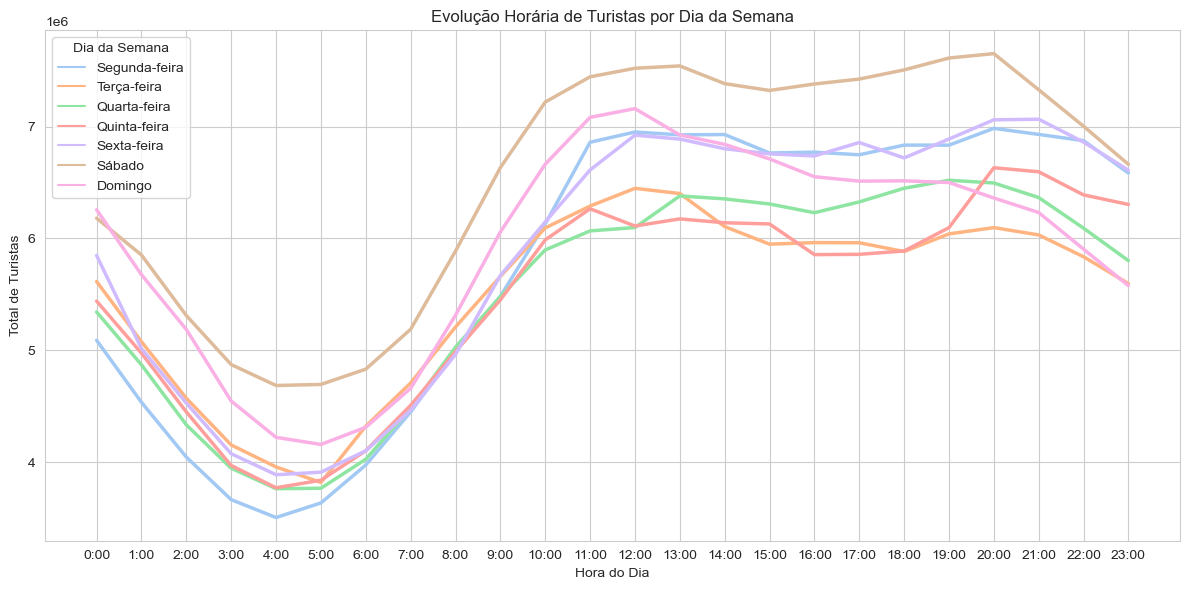

In [15]:
weekday_names = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}   hourly_avg_users = df.groupby(['Weekday', 'Hour'])['C2'].sum().reset_index()  hourly_avg_users['Weekday'] = hourly_avg_users['Weekday'].map(weekday_names)  plt.figure(figsize=(12, 6)) sns.lineplot(data=hourly_avg_users, x='Hour', y='C2', hue='Weekday', palette='pastel', linewidth=2.5)  plt.title('Evolução Horária de Turistas por Dia da Semana') plt.xlabel('Hora do Dia') plt.ylabel('Total de Turistas') plt.legend(title='Dia da Semana') plt.xticks(hourly_avg_users['Hour'].unique(), labels=[f"{hour}:00" for hour in hourly_avg_users['Hour'].unique()]) plt.tight_layout() plt.show()

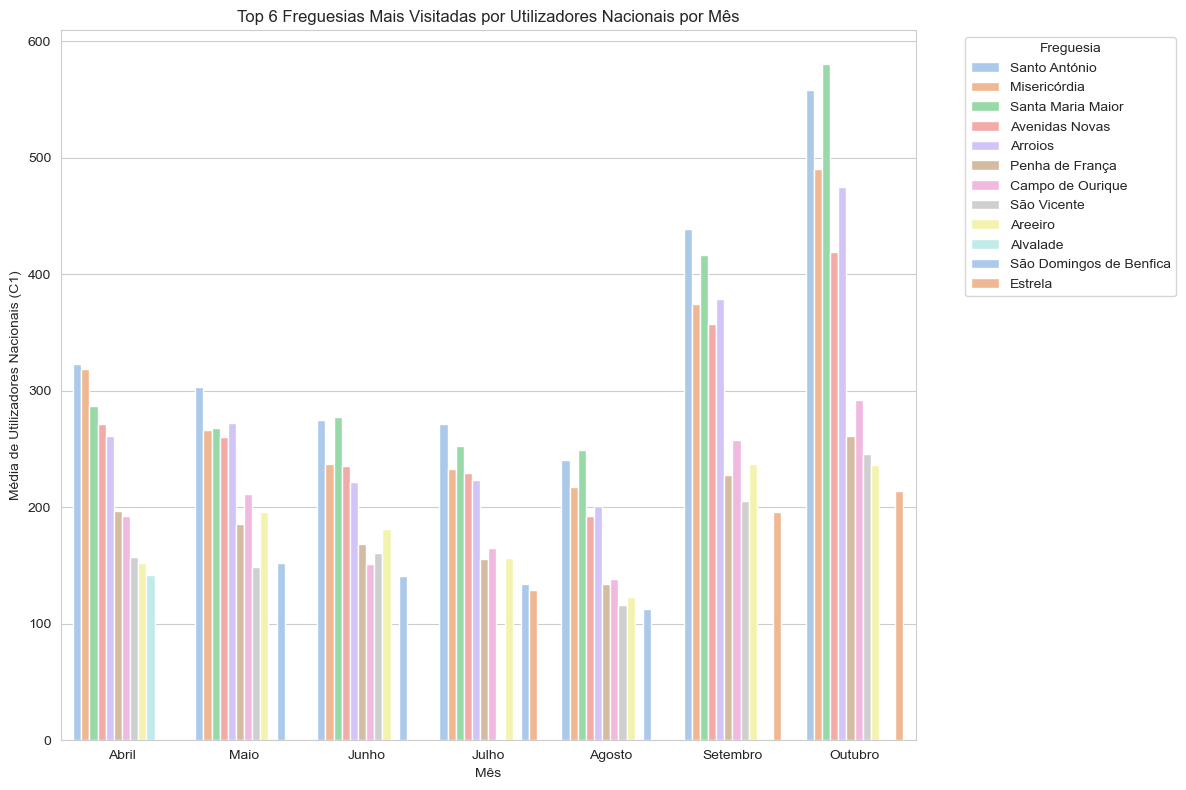

In [32]:
 top_6_parishes = monthly_avg_users.groupby('Month').apply(lambda x: x.nlargest(10, 'C1')).reset_index(drop=True)  month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'Abril', 5: 'Maio', 6: 'Junho',                7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'November', 12: 'December'}  top_6_parishes['Month'] = top_6_parishes['Month'].map(month_names)  plt.figure(figsize=(12, 8)) sns.barplot(data=top_6_parishes, x='Month', y='C1', hue='Parish', palette='pastel')  plt.title('Top 6 Freguesias Mais Visitadas por Utilizadores Nacionais por Mês') plt.xlabel('Mês') plt.ylabel('Média de Utilizadores Nacionais (C1)') plt.legend(title='Freguesia', bbox_to_anchor=(1.05, 1), loc='upper left') plt.tight_layout() plt.show() 

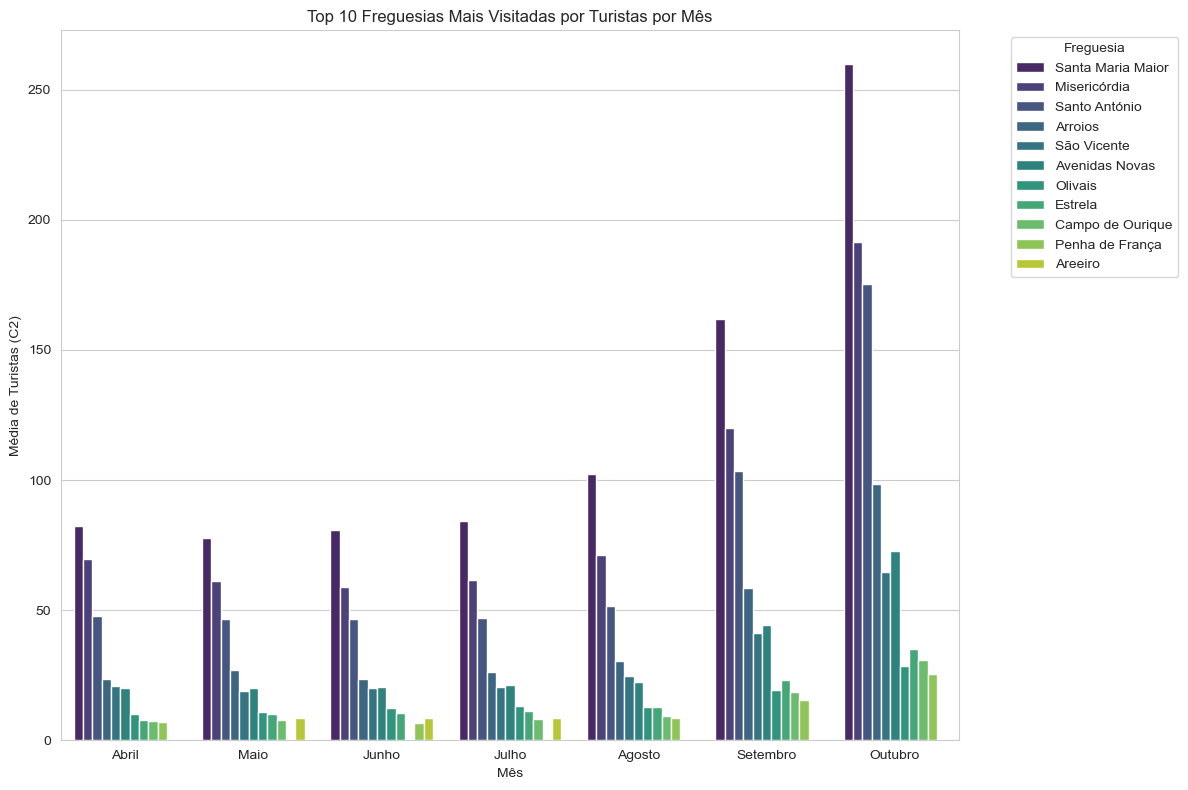

In [36]:
monthly_avg_tourist_users = df.groupby(['Month', 'Parish'])['C2'].mean().reset_index()  top_6_tourist_parishes = monthly_avg_tourist_users.groupby('Month').apply(lambda x: x.nlargest(10, 'C2')).reset_index(drop=True)  top_6_tourist_parishes['Month'] = top_6_tourist_parishes['Month'].map(month_names)  plt.figure(figsize=(12, 8)) sns.barplot(data=top_6_tourist_parishes, x='Month', y='C2', hue='Parish', palette='viridis')  plt.title('Top 10 Freguesias Mais Visitadas por Turistas por Mês') plt.xlabel('Mês') plt.ylabel('Média de Turistas (C2)') plt.legend(title='Freguesia', bbox_to_anchor=(1.05, 1), loc='upper left') plt.tight_layout() plt.show() 

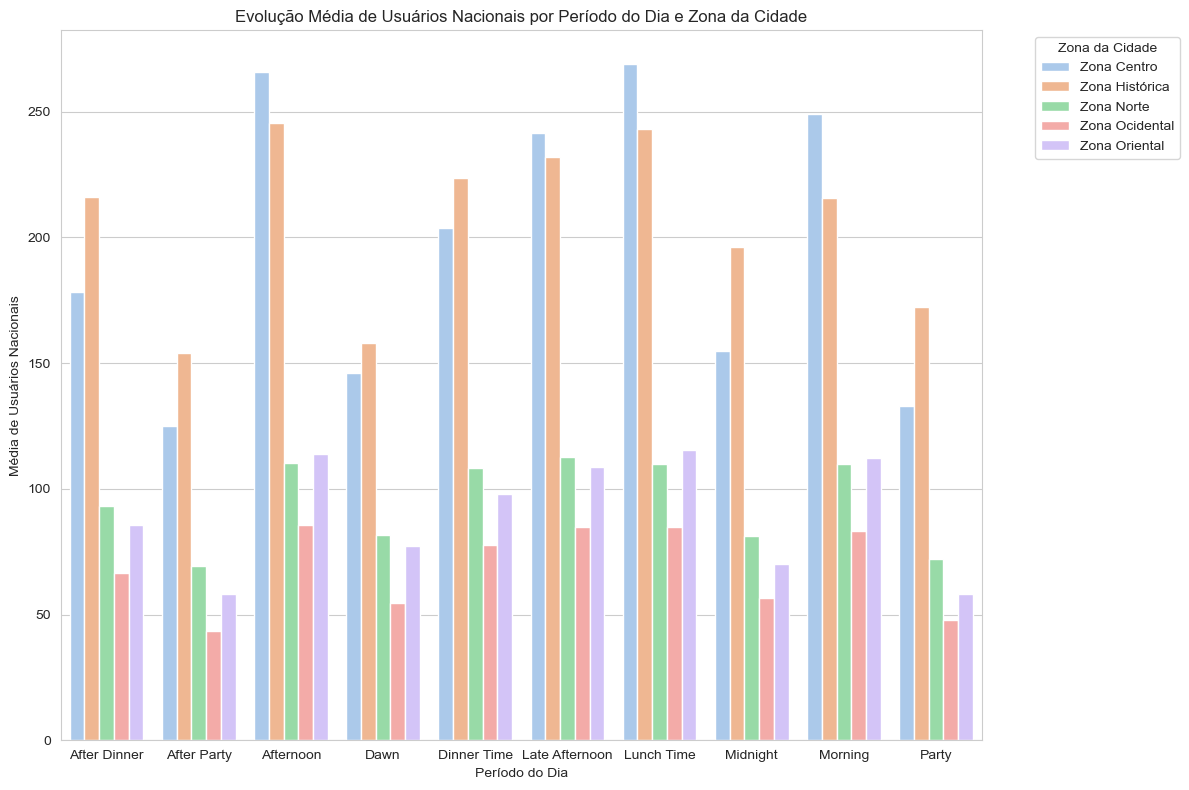

In [41]:
import seaborn as sns import matplotlib.pyplot as plt  avg_users = df.groupby(['Day Moment', 'City Zone'])['C1'].mean().reset_index()  plt.figure(figsize=(12, 8)) sns.barplot(data=avg_users, x='Day Moment', y='C1', hue='City Zone', palette='pastel')  # Configurações do gráfico plt.title('Evolução Média de Usuários Nacionais por Período do Dia e Zona da Cidade') plt.xlabel('Período do Dia') plt.ylabel('Média de Usuários Nacionais') plt.legend(title='Zona da Cidade', bbox_to_anchor=(1.05, 1), loc='upper left') plt.tight_layout() plt.show() 

          Grid_ID             Datetime          C1     C2          C3     C4  \ 1583231      2032  2022-08-01 21:45:00  141.089996   9.63   78.260002   3.85    1583241      2032  2022-08-01 20:15:00  108.910004  14.78   72.110001   9.24    1583243      2032  2022-08-01 21:00:00  158.229996  11.31  114.250000  11.31    1583244      2032  2022-08-01 21:15:00  131.759995  11.46  100.190002   7.64    1583246      2032  2022-08-01 20:00:00  133.529999  11.02   99.620003   9.19    ...           ...                  ...         ...    ...         ...    ...    74470350     2569  2022-06-12 20:45:00   11.020000   1.49    6.660000   1.49    74470351     2569  2022-06-12 21:45:00   12.170000   3.01    4.060000   0.00    74470353     2569  2022-06-13 21:30:00    1.350000   1.35    1.350000   1.35    74470355     2569  2022-06-28 19:15:00   12.110000   0.00    1.980000   0.00    74470356     2569  2022-06-28 19:00:00   30.910000   0.00    1.990000   0.00                                            

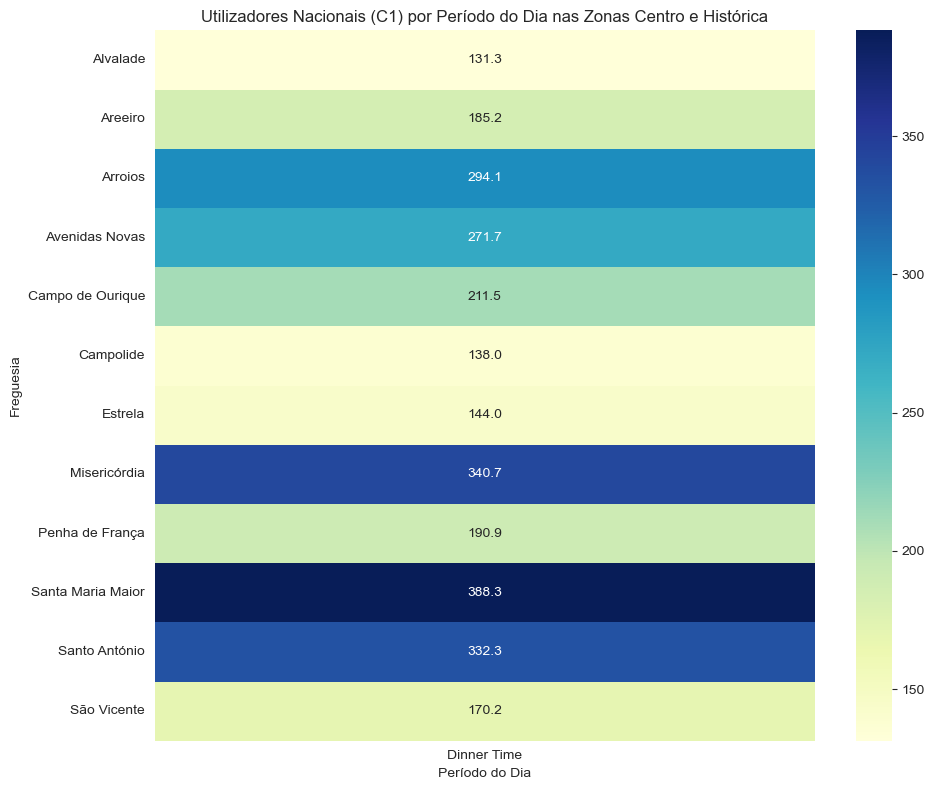

In [8]:
import matplotlib.pyplot as plt import seaborn as sns  day_periods = ['Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']  center_historic_zones = ['Campolide', 'Avenidas Novas', 'Alvalade', 'Arroios', 'Santo António', 'Areeiro',                          'Estrela', 'Campo de Ourique', 'Misericórdia', 'Santa Maria Maior', 'São Vicente', 'Penha de França']  filtered_df = df[df['Parish'].isin(center_historic_zones)]  filtered_df = filtered_df[(filtered_df['Day Moment'] == 'Dinner Time')]  print(filtered_df) pivot_table = filtered_df.pivot_table(values='C1', index='Parish', columns='Day Moment', aggfunc='mean')  plt.figure(figsize=(10, 8)) sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")  plt.title('Utilizadores Nacionais (C1) por Período do Dia nas Zonas Centro e Histórica') plt.xlabel('Período do Dia') plt.ylabel('Freguesia')  plt.tight_layout() plt.show() 

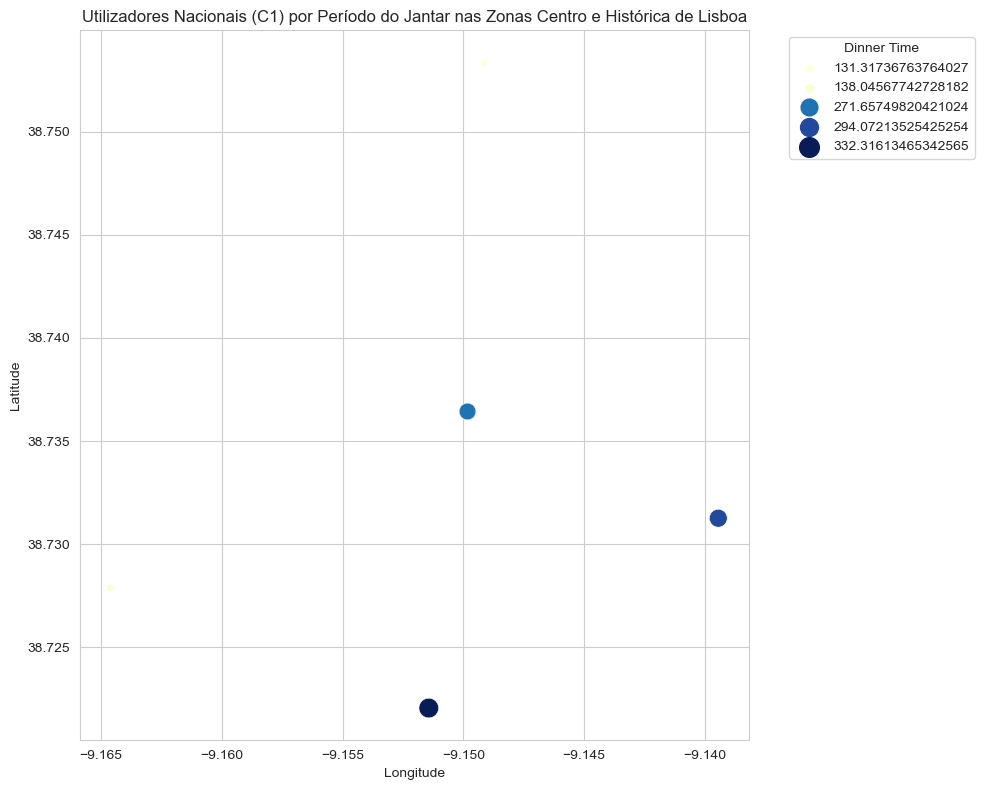

In [9]:
import geopy from geopy.geocoders import Nominatim import pandas as pd import seaborn as sns import matplotlib.pyplot as plt   parishes = ['Campolide', 'Avenidas Novas', 'Alvalade', 'Arroios', 'Santo António']  geolocator = Nominatim(user_agent="geoapiExercises")  latitudes = [] longitudes = []  for parish in parishes:     location = geolocator.geocode(parish + ', Lisbon')     latitudes.append(location.latitude)     longitudes.append(location.longitude)  data = {'Parish': parishes, 'Latitude': latitudes, 'Longitude': longitudes} df_coordinates = pd.DataFrame(data)  filtered_df = df[df['Day Moment'] == 'Dinner Time']  pivot_table = filtered_df.pivot_table(values='C1', index='Parish', columns='Day Moment', aggfunc='mean')  merged_df = pd.merge(df_coordinates, pivot_table, on='Parish')  plt.figure(figsize=(10, 8)) sns.scatterplot(x='Longitude', y='Latitude', data=merged_df, hue='Dinner Time', palette='YlGnBu', size='Dinner Time', sizes=(20, 200)) plt.legend(title='Dinner Time', bbox_to_anchor=(1.05, 1), loc='upper left') plt.xlabel('Longitude') plt.ylabel('Latitude') plt.title('Utilizadores Nacionais (C1) por Período do Jantar nas Zonas Centro e Histórica de Lisboa') plt.tight_layout() plt.show() 

In [10]:
import folium from folium.plugins import MarkerCluster import geopy from geopy.geocoders import Nominatim import pandas as pd  parishes = ['Campolide', 'Avenidas Novas', 'Alvalade', 'Arroios', 'Santo António']  geolocator = Nominatim(user_agent="geoapiExercises")  latitudes = [] longitudes = []  for parish in parishes:     location = geolocator.geocode(parish + ', Lisbon')     latitudes.append(location.latitude)     longitudes.append(location.longitude)  data = {'Parish': parishes, 'Latitude': latitudes, 'Longitude': longitudes} df_coordinates = pd.DataFrame(data)  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  marker_cluster = MarkerCluster().add_to(m)  for i, row in df_coordinates.iterrows():     folium.Marker([row['Latitude'], row['Longitude']], popup=row['Parish']).add_to(marker_cluster)  m 

In [11]:
import folium from folium.plugins import MarkerCluster import pandas as pd  parishes = ['Campolide', 'Avenidas Novas', 'Alvalade', 'Arroios', 'Santo António'] values = [10, 20, 30, 40, 50]    coordinates = {     'Campolide': [38.7312, -9.1656],     'Avenidas Novas': [38.7317, -9.1496],     'Alvalade': [38.7539, -9.1447],     'Arroios': [38.7268, -9.1354],     'Santo António': [38.7223, -9.1451] }  data = {'Parish': parishes, 'Values': values} df = pd.DataFrame(data)  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  marker_cluster = MarkerCluster().add_to(m)  for i, row in df.iterrows():     folium.CircleMarker(         location=coordinates[row['Parish']],         radius=10,         popup=f"{row['Parish']}: {row['Values']}",         color='blue',  # Cor dos marcadores         fill=True,         fill_color='blue',  # Cor de preenchimento dos marcadores         fill_opacity=0.7     ).add_to(marker_cluster)  m 

In [21]:
import pandas as pd  df1 = df.copy()   df2 = pd.read_csv('/Users/isabel/Library/CloudStorage/OneDrive-ISEC/Mestrado/23-24/LAD/Desafio#74 ALL/Datasets/2/VODAFONE_QUADRICULAS_CLEAN.csv')   print(df1.head()) new_df = pd.merge(df1, df2[['Grid_ID', 'latitude', 'longitude']], on='Grid_ID')  print(new_df) 

   Grid_ID             Datetime         C1    C2         C3    C4  \ 0     3000  2022-08-01 21:30:00  49.439999  1.92  34.939999  1.92    1     3000  2022-08-01 17:30:00  66.739998  9.04  48.900002  5.43    2     3000  2022-08-01 12:00:00  43.869999  4.88  42.740002  4.88    3     3000  2022-08-01 15:45:00  24.860001  7.27  16.410000  5.45    4     3000  2022-08-01 19:15:00  48.049999  9.08  37.630001  7.26                                         D1  Year  Month  Day      Time  \ 0                          Switzerland  2022      8    1  21:30:00    1  Austria;France;Ukraine;Spain;Brazil  2022      8    1  17:30:00    2                        Belgium;Spain  2022      8    1  12:00:00    3                         Italy;Brazil  2022      8    1  15:45:00    4          Italy;Spain;Ireland;Ukraine  2022      8    1  19:15:00        Tourist_Local     Holiday      Day Moment  Hour  Weekday   Parish  \ 0              1  No Holiday     Dinner Time    21        0  Olivais    1              1  No

In [25]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Dinner Time'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C1'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [28]:
import folium from folium.plugins import HeatMap import pandas as pd     filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['After Dinner'])]  heat_data = filtered_df.groupby(['latitude', 'longitude'])['C1'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  HeatMap(heat_data, radius=15).add_to(m)  m

In [29]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Midnight'])]  heat_data = filtered_df.groupby(['latitude', 'longitude'])['C1'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  HeatMap(heat_data, radius=15).add_to(m)  m

In [30]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Party'])]  heat_data = filtered_df.groupby(['latitude', 'longitude'])['C1'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [31]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['After Party'])]  heat_data = filtered_df.groupby(['latitude', 'longitude'])['C1'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  HeatMap(heat_data, radius=15).add_to(m)  m

#### Heatmaps Turistas

In [32]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Dinner Time'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C2'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [35]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['After Dinner'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C2'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [34]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Midnight'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C2'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [36]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['Party'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C2'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [37]:
filtered_df = new_df[new_df['City Zone'].isin(['Zona Histórica'])] filtered_df = new_df[new_df['Day Moment'].isin(['After Party'])] heat_data = filtered_df.groupby(['latitude', 'longitude'])['C2'].sum().reset_index().values.tolist()  m = folium.Map(location=[38.7223, -9.1393], zoom_start=13) HeatMap(heat_data, radius=15).add_to(m) m

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'> RangeIndex: 75173085 entries, 0 to 75173084 Data columns (total 18 columns):  #   Column         Dtype   ---  ------         -----    0   Grid_ID        int64    1   Datetime       object   2   C1             float64  3   C2             float64  4   C3             float64  5   C4             float64  6   D1             object   7   Year           int64    8   Month          int64    9   Day            int64    10  Time           object   11  Tourist_Local  int64    12  Holiday        object   13  Day Moment     object   14  Hour           int64    15  Weekday        int64    16  Parish         object   17  City Zone      object  dtypes: float64(4), int64(7), object(7) memory usage: 10.1+ GB 

In [39]:
df.head()

,Grid_ID,Datetime,C1,C2,C3,C4,D1,Year,Month,Day,Time,Tourist_Local,Holiday,Day Moment,Hour,Weekday,Parish,City Zone
0,3000,2022-08-01 21:30:00,49.439999,1.92,34.939999,1.92,Switzerland,2022,8,1,21:30:00,1,No Holiday,Dinner Time,21,0,Olivais,Zona Oriental
1,3000,2022-08-01 17:30:00,66.739998,9.04,48.900002,5.43,Austria;France;Ukraine;Spain;Brazil,2022,8,1,17:30:00,1,No Holiday,Late Afternoon,17,0,Olivais,Zona Oriental
2,3000,2022-08-01 12:00:00,43.869999,4.88,42.740002,4.88,Belgium;Spain,2022,8,1,12:00:00,1,No Holiday,Lunch Time,12,0,Olivais,Zona Oriental
3,3000,2022-08-01 15:45:00,24.860001,7.27,16.410000,5.45,Italy;Brazil,2022,8,1,15:45:00,1,No Holiday,Afternoon,15,0,Olivais,Zona Oriental
4,3000,2022-08-01 19:15:00,48.049999,9.08,37.630001,7.26,Italy;Spain;Ireland;Ukraine,2022,8,1,19:15:00,1,No Holiday,Dinner Time,19,0,Olivais,Zona Oriental


In [40]:
zone_counts = df['City Zone'].value_counts() print(zone_counts) 

City Zone Zona Norte        22674425 Zona Oriental     18115384 Zona Centro       13556506 Zona Histórica     9419248 Zona Ocidental     6085345 Name: count, dtype: int64 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'> RangeIndex: 75173085 entries, 0 to 75173084 Data columns (total 18 columns):  #   Column         Dtype   ---  ------         -----    0   Grid_ID        int64    1   Datetime       object   2   C1             float64  3   C2             float64  4   C3             float64  5   C4             float64  6   D1             object   7   Year           int64    8   Month          int64    9   Day            int64    10  Time           object   11  Tourist_Local  int64    12  Holiday        object   13  Day Moment     object   14  Hour           int64    15  Weekday        int64    16  Parish         object   17  City Zone      object  dtypes: float64(4), int64(7), object(7) memory usage: 10.1+ GB 

In [42]:
import pandas as pd new_df = df[df['City Zone'] == 'Zona Histórica'] new_df.info()

<class 'pandas.core.frame.DataFrame'> Index: 9419248 entries, 2975999 to 73021726 Data columns (total 18 columns):  #   Column         Dtype   ---  ------         -----    0   Grid_ID        int64    1   Datetime       object   2   C1             float64  3   C2             float64  4   C3             float64  5   C4             float64  6   D1             object   7   Year           int64    8   Month          int64    9   Day            int64    10  Time           object   11  Tourist_Local  int64    12  Holiday        object   13  Day Moment     object   14  Hour           int64    15  Weekday        int64    16  Parish         object   17  City Zone      object  dtypes: float64(4), int64(7), object(7) memory usage: 1.3+ GB 